# Analyse [Odyssea]( https://data.marine.copernicus.eu/product/SST_ATL_PHY_L3S_NRT_010_037/description) data 

The kerchunk and intake catalogue used here were created using [this jupyter notebook](https://github.com/umr-lops/auto-kerchunk/blob/main/notebooks/manual_kerchunk-odyssey.ipynb). The Odyssea data contains various regions and versions, but for the TAOS project, we only utilized l3s and l4 data from the Atlantique ocean region. As a result, the catalogue exclusively contains data from those specific regions and versions.

In [1]:
import intake
import xarray as xr

catalogue="/home/datawork-taos-s/intranet/kerchunk/ref-cersat.yaml"
catalogue = "https://data-taos.ifremer.fr/kerchunk/ref-cersat.yaml"

# Open intake catalgue.  

In [3]:
cat = intake.open_catalog(catalogue)
cat

cersat:
  args:
    path: https://data-taos.ifremer.fr/kerchunk/ref-cersat.yaml
  description: ''
  driver: intake.catalog.local.YAMLFileCatalog
  metadata: {}


## Define a level and region and load the dataset
The cagalogue contais today (2023-07-20) l3s and l4 at atl


In [5]:
sst_l3s = intake.open_catalog(catalogue).cersat(region='atl' , level='l3s').to_dask()
sst_l3s

<xarray.Dataset>
Dimensions:                           (time: 946, lat: 2950, lon: 2000)
Coordinates:
  * lat                               (lat) float32 6.01 6.03 ... 64.97 64.99
  * lon                               (lon) float32 -23.99 -23.97 ... 15.99
  * time                              (time) datetime64[ns] 2020-12-16 ... 20...
Data variables:
    adjusted_sea_surface_temperature  (time, lat, lon) float32 dask.array<chunksize=(1, 1475, 1000), meta=np.ndarray>
    or_latitude                       (time, lat, lon) float32 dask.array<chunksize=(1, 1475, 1000), meta=np.ndarray>
    or_longitude                      (time, lat, lon) float32 dask.array<chunksize=(1, 1475, 1000), meta=np.ndarray>
    or_number_of_pixels               (time, lat, lon) float32 dask.array<chunksize=(1, 1475, 1000), meta=np.ndarray>
    quality_level                     (time, lat, lon) float32 dask.array<chunksize=(1, 1475, 1000), meta=np.ndarray>
    satellite_zenith_angle            (time, lat, lon) float32 dask.array<chunksize=(1, 1475, 1000), meta=np.ndarray>
    sea_surface_temperature           (time, lat, lon) float32 dask.array<chunksize=(1, 1475, 1000), meta=np.ndarray>
    solar_zenith_angle                (time, lat, lon) float32 dask.array<chunksize=(1, 1475, 1000), meta=np.ndarray>
    source_of_sst                     (time, lat, lon) float32 dask.array<chunksize=(1, 1475, 1000), meta=np.ndarray>
    sses_bias                         (time, lat, lon) float32 dask.array<chunksize=(1, 1475, 1000), meta=np.ndarray>
    sses_standard_deviation           (time, lat, lon) float32 dask.array<chunksize=(1, 1475, 1000), meta=np.ndarray>
    sst_dtime                         (time, lat, lon) timedelta64[ns] dask.array<chunksize=(1, 1475, 1000), meta=np.ndarray>
Attributes: (12/71)
    Conventions:                     CF-1.7, ACDD-1.3, ISO 8601
    acknowledgment:                  This dataset is funded by Copernicus Mar...
    cdm_data_type:                   grid
    citation:                        Ifremer / CERSAT. 2022. ODYSSEA North Ea...
    cmems_product_id:                SST_ATL_PHY_L3S_NRT_010_037
    contact:                         emmanuelle.autret@ifremer.fr;jfpiolle@if...
    ...                              ...
    temporal_resolution:             daily
    time_coverage_end:               2021-06-24T12:00:00
    time_coverage_resolution:        P1D
    time_coverage_start:             2021-06-23T12:00:00
    title:                           ODYSSEA North-East Atlantic Sea Surface ...
    uuid:                            cab3c21e-a202-4ce5-acfb-c191532d4ea7

## Plot data to verify. 

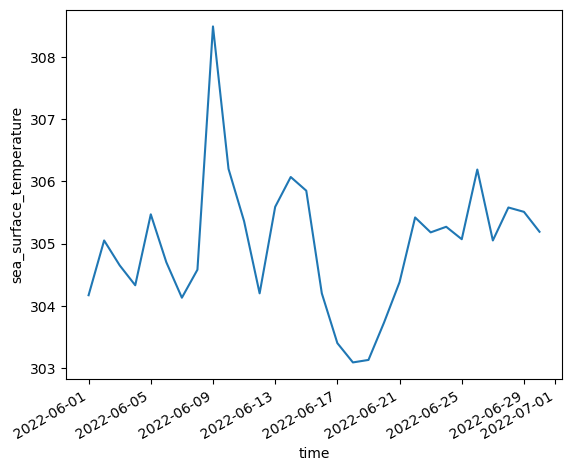

In [6]:
sst_l3s.sea_surface_temperature.sel(time='2022-06').max(dim=['lat','lon']).plot()
